Persona 56 infectada en t=1
Persona 66 infectada en t=1
Persona 9 infectada en t=1
Persona 12 infectada en t=2
Persona 48 infectada en t=2
Persona 71 infectada en t=2
Persona 19 infectada en t=2
Persona 23 infectada en t=2
Persona 15 infectada en t=2
Persona 61 infectada en t=2
Persona 2 infectada en t=2
Persona 3 infectada en t=2
Persona 90 infectada en t=2
Persona 63 infectada en t=2
Persona 98 infectada en t=2
Persona 60 infectada en t=2
Persona 39 infectada en t=3
Persona 86 infectada en t=3
Persona 40 infectada en t=3
Persona 4 infectada en t=3
Persona 67 infectada en t=3
Persona 96 infectada en t=3
Persona 5 infectada en t=3
Persona 22 infectada en t=3
Persona 62 infectada en t=3
Persona 97 infectada en t=3
Persona 43 infectada en t=3
Persona 20 infectada en t=3
Persona 18 infectada en t=3
Persona 28 infectada en t=3
Persona 50 infectada en t=3
Persona 46 infectada en t=3
Persona 7 infectada en t=3
Persona 83 infectada en t=3
Persona 80 infectada en t=3
Persona 89 infectada en t=

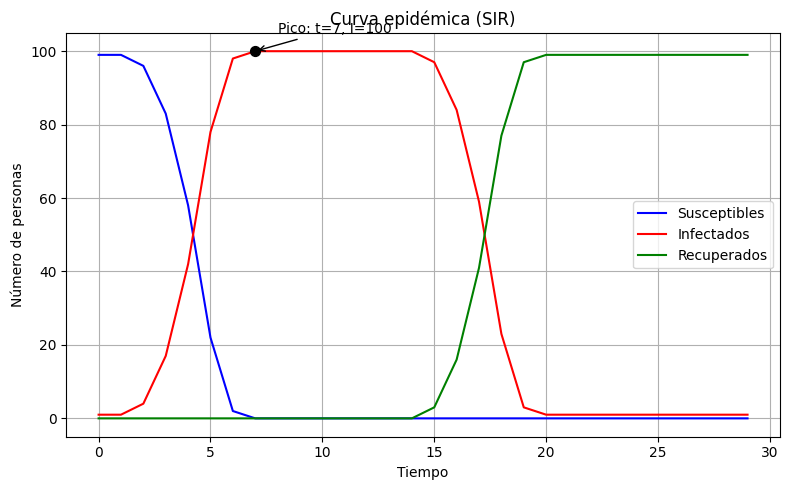

Número Básico de Reproducción: 35.0


In [1]:
import simpy
import random
import matplotlib.pyplot as plt

infect = 5
infectProbability = 0.5
time = 14


class Persona:
    
    def __init__(self, env, id, estado_inicial="S"):
        self.env = env
        self.id = id
        self.estado = estado_inicial

    def infectar(self):
        if self.estado == "S" and random.random() < infectProbability:  # 30% de probabilidad
            self.estado = "I"
            print(f"Persona {self.id} infectada en t={self.env.now}")
            yield self.env.timeout(time)  # Tiempo de recuperación
            self.estado = "R"


def simulacion(env, num_personas=100, duracion=30):
    personas = [Persona(env, i) for i in range(num_personas)]
    personas[0].estado = "I"  # Paciente cero

    # Listas para guardar la curva epidémica
    tiempos = []
    susceptibles = []
    infectados = []
    recuperados = []

    while env.now < duracion:
        for persona in personas:
            if persona.estado == "I":
                vecinos = random.sample(personas, infect)
                for vecino in vecinos:
                    env.process(vecino.infectar())

        # Contar estados en este instante
        s = sum(1 for p in personas if p.estado == "S")
        i = sum(1 for p in personas if p.estado == "I")
        r = sum(1 for p in personas if p.estado == "R")

        tiempos.append(env.now)
        susceptibles.append(s)
        infectados.append(i)
        recuperados.append(r)

        yield env.timeout(1)

    # ======= Gráfica 1: Curva epidémica (S, I, R vs tiempo) =======
    plt.figure(figsize=(8, 5))
    plt.plot(tiempos, susceptibles, label="Susceptibles", color="blue")
    plt.plot(tiempos, infectados, label="Infectados", color="red")
    plt.plot(tiempos, recuperados, label="Recuperados", color="green")
    plt.xlabel("Tiempo")
    plt.ylabel("Número de personas")
    plt.title("Curva epidémica (SIR)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # ======= Encontrar el pico de infección =======
    pico_idx = max(range(len(infectados)), key=lambda idx: infectados[idx])
    tiempo_pico = tiempos[pico_idx]
    valor_pico = infectados[pico_idx]

    # Marcar el pico en la misma gráfica
    plt.scatter([tiempo_pico], [valor_pico], color="black", s=50, zorder=5)
    plt.annotate(
        f"Pico: t={tiempo_pico}, I={valor_pico}",
        xy=(tiempo_pico, valor_pico),
        xytext=(tiempo_pico + 1, valor_pico + 5),
        arrowprops=dict(arrowstyle="->", color="black")
        # fontsize= nine
    )
    plt.show()

    # ======= Gráfica 2: Pico de infección =======
    # plt.figure(figsize=(6, 4))
    # plt.bar([tiempo_pico], [valor_pico], color="red", width=0.8)
    # plt.xlabel("Tiempo del pico")
    # plt.ylabel("Número de infectados en el pico")
    # plt.title("Pico de infección")
    # plt.xticks([tiempo_pico])
    # plt.grid(axis="y", linestyle="--", alpha=0.7)
    # plt.tight_layout()
    # plt.show()


# Ejecutar simulación
env = simpy.Environment()
env.process(simulacion(env))
env.run()
result = infect*infectProbability*time
print(f"Número Básico de Reproducción: {result}") 